# Regression

### Data preparation

In [739]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [602]:
reg_train = pd.read_csv('Regression_train (1).csv')
reg_test = pd.read_csv('Regression_test (1).csv')

finding rows with more than 3 missing values in a row... <br>
there are 172 rows with more than 3 missing values.

In [603]:
missing_values_count = reg_train.isnull().sum(axis=1)
rows_with_more_than_3_missing_values = reg_train[missing_values_count > 3]
rows_with_more_than_3_missing_values

,Crash ID,Crash Severity,Crash Time,Day of Week,Manner of Collision,Speed Limit,Surface Condition,Surface Type,Surface Width,Weather Condition,Vehicle Body Style,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,y
25,19524493,N - NOT INJURED,NaN,WEDNESDAY,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,60,1 - DRY,No Data,48,NaN,NaN,No Data,NaN,No Data,99 - UNKNOWN,2 - FEMALE,0
43,19640298,N - NOT INJURED,17:29:00,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,75,1 - DRY,No Data,48,NaN,SV - SPORT UTILITY VEHICLE,10,No Data,No Data,NaN,NaN,41
62,19656118,C - POSSIBLE INJURY,14:55:00,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,55,1 - DRY,No Data,No Data,NaN,"P4 - PASSENGER CAR, 4-DOOR",43,NaN,97 - NOT APPLICABLE,B - BLACK,NaN,98
150,19751956,C - POSSIBLE INJURY,NaN,SATURDAY,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,55,1 - DRY,No Data,20,NaN,SV - SPORT UTILITY VEHICLE,61,No Data,NaN,W - WHITE,NaN,50
233,19656365,N - NOT INJURED,10:14:00,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-SIDESWIPE,70,1 - DRY,No Data,NaN,1 - CLEAR,PK - PICKUP,72,NaN,No Data,NaN,2 - FEMALE,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,19629827,N - NOT INJURED,NaN,NaN,ANGLE - ONE STRAIGHT-ONE LEFT TURN,35,1 - DRY,No Data,No Data,NaN,SV - SPORT UTILITY VEHICLE,82,No Data,97 - NOT APPLICABLE,W - WHITE,NaN,43
12719,19584615,N - NOT INJURED,11:33:00,FRIDAY,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,55,1 - DRY,No Data,NaN,1 - CLEAR,"P4 - PASSENGER CAR, 4-DOOR",4,NaN,NaN,NaN,2 - FEMALE,18
12813,19653696,N - NOT INJURED,NaN,FRIDAY,SAME DIRECTION - ONE STRAIGHT-ONE STOPPED,40,1 - DRY,No Data,No Data,1 - CLEAR,NaN,19,NaN,NaN,B - BLACK,1 - MALE,60
12908,19635305,B - SUSPECTED MINOR INJURY,NaN,NaN,SAME DIRECTION - BOTH GOING STRAIGHT-REAR END,70,1 - DRY,No Data,92,1 - CLEAR,SV - SPORT UTILITY VEHICLE,NaN,No Data,97 - NOT APPLICABLE,NaN,1 - MALE,67


In [604]:
reg_train.shape

(13041, 17)

In [605]:
reg_train.columns

Index(['Crash ID', 'Crash Severity', 'Crash Time', 'Day of Week',
       'Manner of Collision', 'Speed Limit', 'Surface Condition',
       'Surface Type', 'Surface Width', 'Weather Condition',
       'Vehicle Body Style', 'Person Age', 'Person Alcohol Result',
       'Person Drug Test Result', 'Person Ethnicity', 'Person Gender', 'y'],
      dtype='object')

Since 'Crash ID' is int type, preprocess the 'Crash Severity' column.

In [606]:
reg_train['Crash Severity'].value_counts()

N - NOT INJURED                 8688
B - SUSPECTED MINOR INJURY      1897
C - POSSIBLE INJURY             1861
A - SUSPECTED SERIOUS INJURY     310
99 - UNKNOWN                     245
K - FATAL INJURY                  40
Name: Crash Severity, dtype: int64

In [607]:
reg_train['Crash Severity'].fillna(reg_train['Crash Severity'].mode()[0], inplace=True)

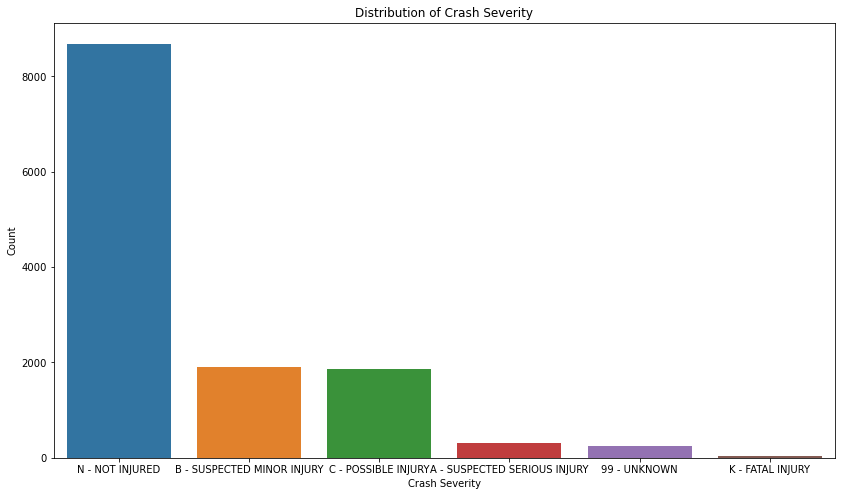

In [608]:
plt.figure(figsize=(14, 8)) 
sns.countplot(x='Crash Severity', data=reg_train)
plt.title('Distribution of Crash Severity')
plt.xlabel('Crash Severity')
plt.ylabel('Count')
plt.show()



In [609]:
reg_train = pd.get_dummies(reg_train, columns=['Crash Severity'], drop_first=True)

In [610]:
reg_train.columns

Index(['Crash ID', 'Crash Time', 'Day of Week', 'Manner of Collision',
       'Speed Limit', 'Surface Condition', 'Surface Type', 'Surface Width',
       'Weather Condition', 'Vehicle Body Style', 'Person Age',
       'Person Alcohol Result', 'Person Drug Test Result', 'Person Ethnicity',
       'Person Gender', 'y', 'Crash Severity_A - SUSPECTED SERIOUS INJURY',
       'Crash Severity_B - SUSPECTED MINOR INJURY',
       'Crash Severity_C - POSSIBLE INJURY', 'Crash Severity_K - FATAL INJURY',
       'Crash Severity_N - NOT INJURED'],
      dtype='object')

Preprocessing `reg_train['Crash Time']` column... 

In [611]:
reg_train['Crash Time'].isnull().sum()

1320

In [612]:
reg_train['Crash Time'].isnull().sum()/reg_train.shape[0]

0.10121923165401427

About 10% of the data has NaN values in it. Fillig this data with the mode of the column.

In [613]:
reg_train['Crash Time'].fillna(reg_train['Crash Time'].mode()[0], inplace=True)

reg_train['Crash Time'] = pd.to_datetime(reg_train['Crash Time'])

reg_train['Hour'] = reg_train['Crash Time'].dt.hour
reg_train['Minute'] = reg_train['Crash Time'].dt.minute
reg_train['Second'] = reg_train['Crash Time'].dt.second

reg_train.drop('Crash Time', axis=1, inplace=True)

Preprocessing `reg_train['Day of Week']` column...

In [614]:
reg_train['Day of Week'].fillna(reg_train['Day of Week'].mode()[0], inplace=True)

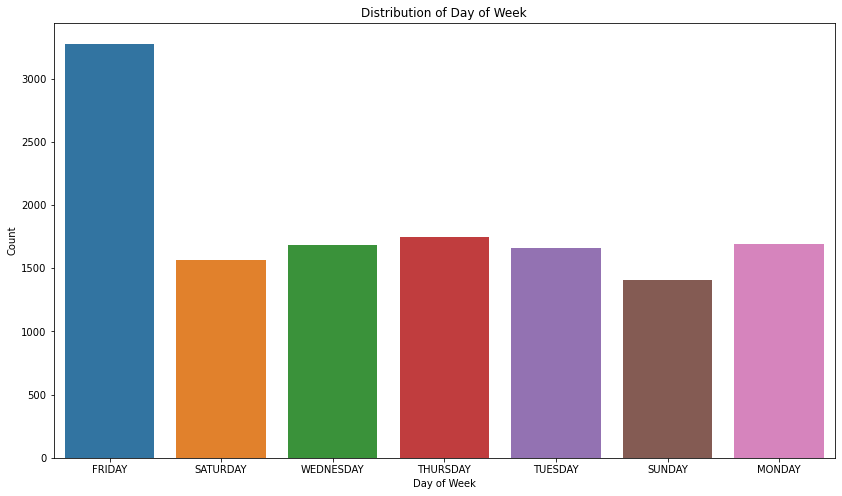

In [615]:
plt.figure(figsize=(14, 8)) 
sns.countplot(x='Day of Week', data=reg_train)
plt.title('Distribution of Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

In [616]:
reg_train = pd.get_dummies(reg_train, columns=['Day of Week'], drop_first=True)

Preprocessing `reg_train['Manner of Collision']` column... 

In [617]:
codes = reg_train['Manner of Collision'].astype('category').cat.codes
mapping = dict(enumerate(reg_train['Manner of Collision'].astype('category').cat.categories))
reg_train['Manner of Collision Labels'] = reg_train['Manner of Collision'].astype('category').cat.codes
mapping

{0: 'ANGLE - BOTH GOING STRAIGHT',
 1: 'ANGLE - BOTH LEFT TURN',
 2: 'ANGLE - BOTH RIGHT TURN',
 3: 'ANGLE - ONE LEFT TURN-ONE STOPPED',
 4: 'ANGLE - ONE RIGHT TURN-ONE LEFT TURN',
 5: 'ANGLE - ONE RIGHT TURN-ONE STOPPED',
 6: 'ANGLE - ONE STRAIGHT-ONE BACKING',
 7: 'ANGLE - ONE STRAIGHT-ONE LEFT TURN',
 8: 'ANGLE - ONE STRAIGHT-ONE RIGHT TURN',
 9: 'ANGLE - ONE STRAIGHT-ONE STOPPED',
 10: 'ONE MOTOR VEHICLE - BACKING',
 11: 'ONE MOTOR VEHICLE - GOING STRAIGHT',
 12: 'ONE MOTOR VEHICLE - OTHER',
 13: 'ONE MOTOR VEHICLE - TURNING LEFT',
 14: 'ONE MOTOR VEHICLE - TURNING RIGHT',
 15: 'OPPOSITE DIRECTION - BOTH GOING STRAIGHT',
 16: 'OPPOSITE DIRECTION - BOTH LEFT TURNS',
 17: 'OPPOSITE DIRECTION - ONE BACKING-ONE STOPPED',
 18: 'OPPOSITE DIRECTION - ONE RIGHT TURN-ONE LEFT TURN',
 19: 'OPPOSITE DIRECTION - ONE STRAIGHT-ONE BACKING',
 20: 'OPPOSITE DIRECTION - ONE STRAIGHT-ONE LEFT TURN',
 21: 'OPPOSITE DIRECTION - ONE STRAIGHT-ONE STOPPED',
 22: 'OTHER',
 23: 'OTHER - BOTH BACKING',
 24:

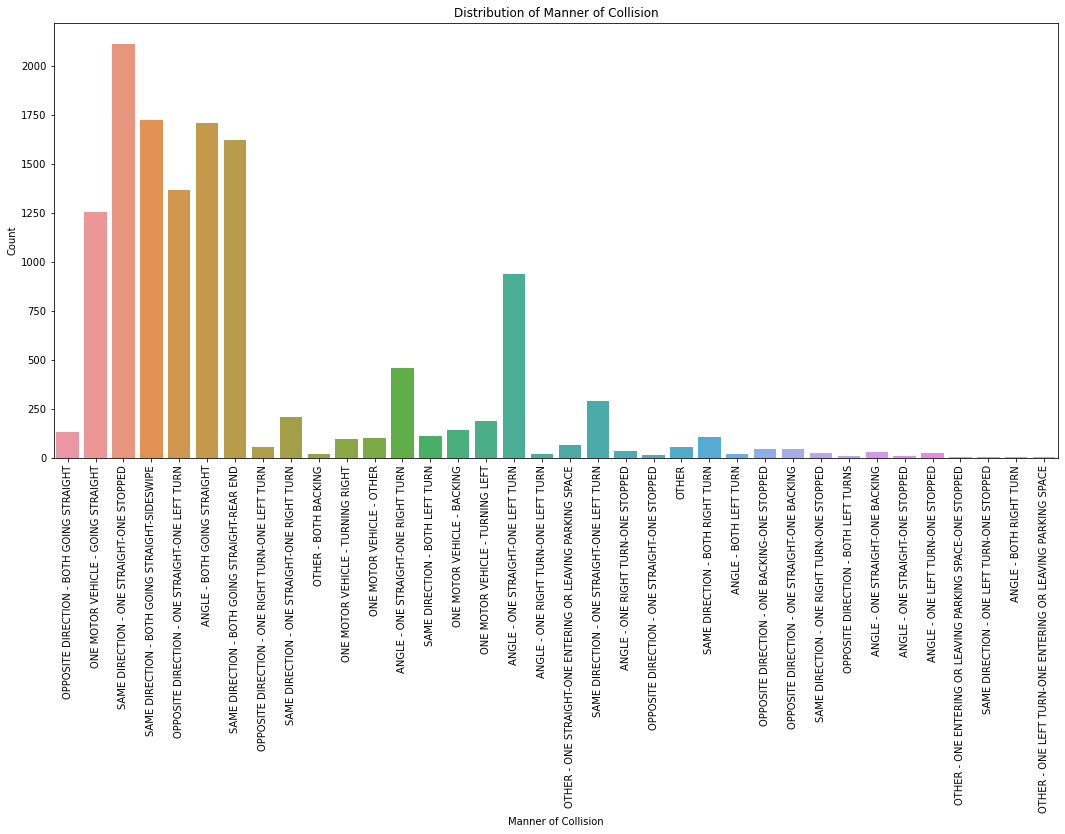

In [618]:
plt.figure(figsize=(18, 8)) 
sns.countplot(x='Manner of Collision', data=reg_train)
plt.title('Distribution of Manner of Collision')
plt.xlabel('Manner of Collision')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='center')
plt.show()

In [619]:
reg_train.drop('Manner of Collision', axis=1, inplace=True)

Preprocessing `reg_train['Surface Condition']` column... 

In [620]:
reg_train['Surface Condition'].value_counts()

1 - DRY                              12122
2 - WET                                845
99 - UNKNOWN                            35
3 - STANDING WATER                      17
7 - SAND, MUD, DIRT                     11
98 - OTHER (EXPLAIN IN NARRATIVE)       11
Name: Surface Condition, dtype: int64

In [621]:
#replacing both 99 - UNKNOWN  and 98 - OTHER (EXPLAIN IN NARRATIVE) values with 1 - DRY
reg_train['Surface Condition'].fillna(reg_train['Surface Condition'].mode()[0], inplace=True)

reg_train['Surface Condition'] = reg_train['Surface Condition'].replace('99 - UNKNOWN', reg_train['Surface Condition'].mode()[0])


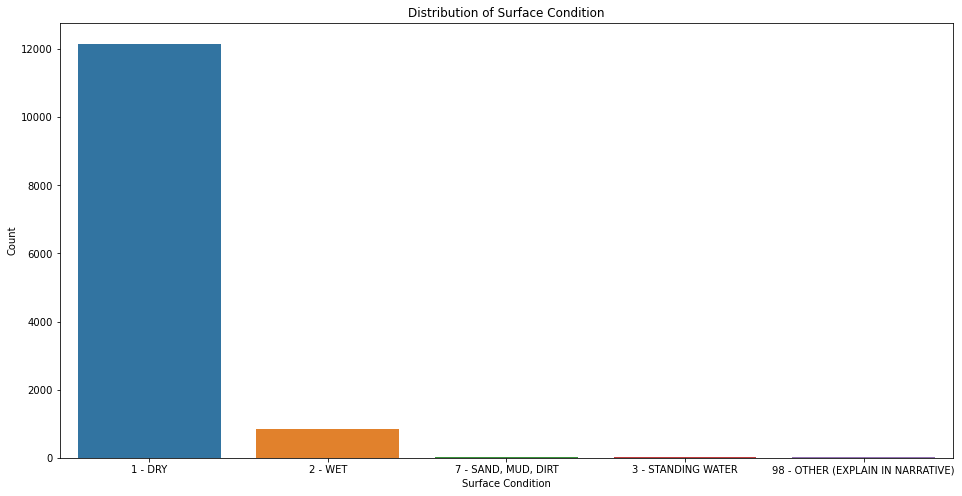

In [622]:
plt.figure(figsize=(16, 8)) 
sns.countplot(x='Surface Condition', data=reg_train)
plt.title('Distribution of Surface Condition')
plt.xlabel('Surface Condition')
plt.ylabel('Count')
plt.show()

In [623]:
reg_train = pd.get_dummies(reg_train, columns=['Surface Condition'], drop_first=True)

Since `reg_train['Surface Type']` column has no data in it. We drop this column.

In [624]:
reg_train['Surface Type'].value_counts()

No Data    13041
Name: Surface Type, dtype: int64

In [625]:
reg_train.drop('Surface Type', axis=1, inplace=True)

Since `reg_train['Surface Width']` has more than 50% of missing data. We drop this column.

In [626]:
reg_train['Surface Width'].value_counts()

No Data    5174
72         2332
48         1755
24          466
64          420
66          189
22          182
50          162
20          146
88          144
44          129
55           99
84           77
52           63
76           59
92           51
78           49
28           39
65           36
89           35
67           30
40           30
74           21
69           19
38           12
26            4
58            3
36            3
62            2
Name: Surface Width, dtype: int64

In [627]:
reg_train.drop('Surface Width', axis=1, inplace=True)

Preprocessing `reg_train['Weather Condition']` column...

In [628]:
reg_train['Weather Condition'].value_counts()

1 - CLEAR                            9947
2 - CLOUDY                           1194
3 - RAIN                              512
99 - UNKNOWN                           40
6 - FOG                                 9
98 - OTHER (EXPLAIN IN NARRATIVE)       8
Name: Weather Condition, dtype: int64

In [629]:
#replacing both 99 - UNKNOWN  and 98 - OTHER (EXPLAIN IN NARRATIVE) values with 1 - CLEAR
reg_train['Weather Condition'].fillna(reg_train['Weather Condition'].mode()[0], inplace=True)

reg_train['Weather Condition'] = reg_train['Weather Condition'].replace('98 - OTHER (EXPLAIN IN NARRATIVE)', reg_train['Weather Condition'].mode()[0])
reg_train['Weather Condition'] = reg_train['Weather Condition'].replace('99 - UNKNOWN', reg_train['Weather Condition'].mode()[0])


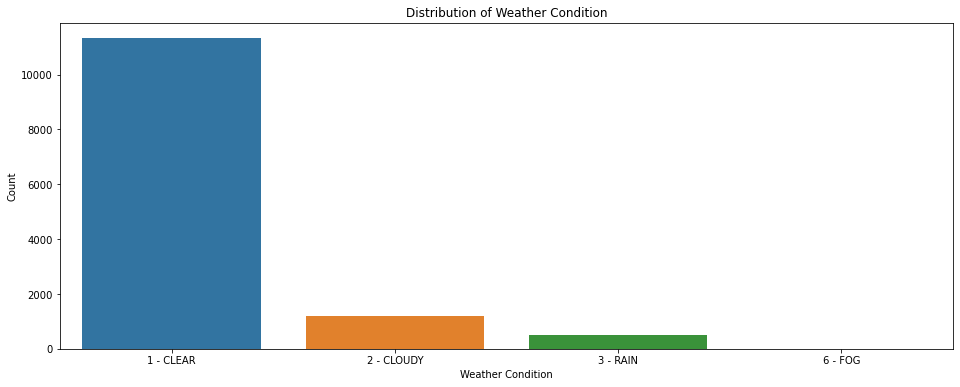

In [630]:
plt.figure(figsize=(16, 6)) 
sns.countplot(x='Weather Condition', data=reg_train)
plt.title('Distribution of Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.show()

In [631]:

reg_train = pd.get_dummies(reg_train, columns=['Weather Condition'], drop_first=True)

Preprocessing `reg_train['Vehicle Body Style']` column...

In [632]:
reg_train['Vehicle Body Style'].isnull().sum()

1322

In [633]:
reg_train['Vehicle Body Style'].unique()

array(['BU - BUS', 'SV - SPORT UTILITY VEHICLE',
       'P4 - PASSENGER CAR, 4-DOOR', 'PK - PICKUP',
       'P2 - PASSENGER CAR, 2-DOOR', 'TR - TRUCK', 'No Data', 'VN - VAN',
       nan, '99 - UNKNOWN', 'TT - TRUCK TRACTOR',
       'SB - YELLOW SCHOOL BUS', '98 - OTHER  (EXPLAIN IN NARRATIVE)',
       'EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE', 'PC - POLICE CAR/TRUCK',
       'AM - AMBULANCE', 'MC - MOTORCYCLE', 'FT - FIRE TRUCK',
       'TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER'], dtype=object)

In [634]:
reg_train['Vehicle Body Style'].value_counts()

P4 - PASSENGER CAR, 4-DOOR                     4336
SV - SPORT UTILITY VEHICLE                     3301
PK - PICKUP                                    1855
VN - VAN                                        466
P2 - PASSENGER CAR, 2-DOOR                      440
99 - UNKNOWN                                    330
TR - TRUCK                                      300
TT - TRUCK TRACTOR                              204
MC - MOTORCYCLE                                 100
BU - BUS                                         98
SB - YELLOW SCHOOL BUS                           98
No Data                                          91
98 - OTHER  (EXPLAIN IN NARRATIVE)               28
FT - FIRE TRUCK                                  24
PC - POLICE CAR/TRUCK                            23
AM - AMBULANCE                                   13
EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE            9
TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER       3
Name: Vehicle Body Style, dtype: int64

In [635]:
reg_train['Vehicle Body Style'].fillna(reg_train['Vehicle Body Style'].mode()[0], inplace=True)

reg_train['Vehicle Body Style'] = reg_train['Vehicle Body Style'].replace('99 - UNKNOWN', reg_train['Vehicle Body Style'].mode()[0])
reg_train['Vehicle Body Style'] = reg_train['Vehicle Body Style'].replace('98 - OTHER  (EXPLAIN IN NARRATIVE)', reg_train['Vehicle Body Style'].mode()[0])
reg_train['Vehicle Body Style'] = reg_train['Vehicle Body Style'].replace('No Data', reg_train['Vehicle Body Style'].mode()[0])

In [636]:
len(reg_train['Vehicle Body Style'].value_counts())

15

In [637]:
codes_VBS = reg_train['Vehicle Body Style'].astype('category').cat.codes
mapping_VBS = dict(enumerate(reg_train['Vehicle Body Style'].astype('category').cat.categories))
reg_train['Vehicle Body Style Labels'] = reg_train['Vehicle Body Style'].astype('category').cat.codes
mapping_VBS

{0: 'AM - AMBULANCE',
 1: 'BU - BUS',
 2: 'EV - NEV-NEIGHBORHOOD ELECTRIC VEHICLE',
 3: 'FT - FIRE TRUCK',
 4: 'MC - MOTORCYCLE',
 5: 'P2 - PASSENGER CAR, 2-DOOR',
 6: 'P4 - PASSENGER CAR, 4-DOOR',
 7: 'PC - POLICE CAR/TRUCK',
 8: 'PK - PICKUP',
 9: 'SB - YELLOW SCHOOL BUS',
 10: 'SV - SPORT UTILITY VEHICLE',
 11: 'TL - TRAILER, SEMI-TRAILER, OR POLE TRAILER',
 12: 'TR - TRUCK',
 13: 'TT - TRUCK TRACTOR',
 14: 'VN - VAN'}

In [638]:
reg_train.drop('Vehicle Body Style', axis=1, inplace=True)

Preprocessing `reg_train['Person Age']` column...

In [639]:
reg_train['Person Age'].isnull().sum()

1278

In [640]:
reg_train['Person Age'] = reg_train['Person Age'].replace('No Data', np.nan)

reg_train['Person Age'].fillna(reg_train['Person Age'].median(), inplace=True)

reg_train['Person Age'] = pd.to_numeric(reg_train['Person Age'], errors='coerce').astype('Int64')

Droppping columns that has no data(large percentage)....

In [641]:
reg_train.drop('Person Alcohol Result', axis=1, inplace=True)
reg_train.drop('Person Drug Test Result', axis=1, inplace=True)

Preprocessing `reg_train['Person Ethnicity']` column...

In [642]:
reg_train['Person Ethnicity'].isnull().sum()

1265

In [643]:
reg_train['Person Ethnicity'].value_counts()

W - WHITE                          5533
H - HISPANIC                       2552
B - BLACK                          1821
A - ASIAN                           957
99 - UNKNOWN                        695
I - AMER. INDIAN/ALASKAN NATIVE     100
98 - OTHER                           64
No Data                              54
Name: Person Ethnicity, dtype: int64

In [644]:
reg_train['Person Ethnicity'].fillna(reg_train['Person Ethnicity'].mode()[0], inplace=True)

reg_train['Person Ethnicity'] = reg_train['Person Ethnicity'].replace(['99 - UNKNOWN', 'No Data'], 'OTHER')

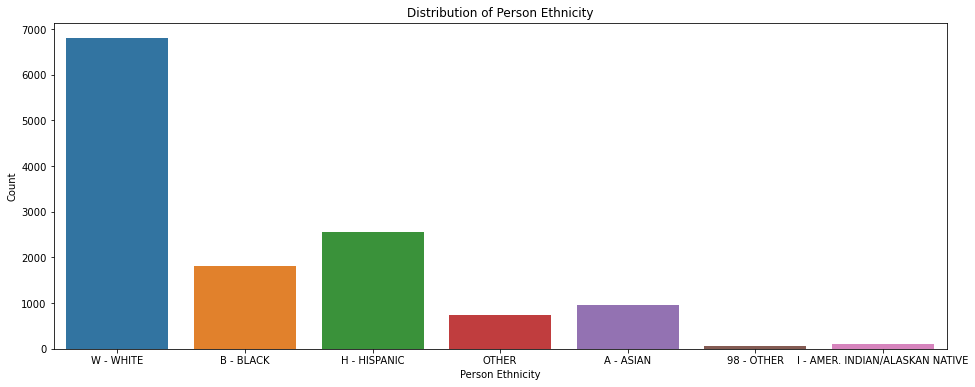

In [645]:
plt.figure(figsize=(16, 6)) 
sns.countplot(x='Person Ethnicity', data=reg_train)
plt.title('Distribution of Person Ethnicity')
plt.xlabel('Person Ethnicity')
plt.ylabel('Count')
plt.show()

In [646]:
reg_train = pd.get_dummies(reg_train, columns=['Person Ethnicity'], drop_first=True)

Preprocessing `reg_train['Person Gender']` column...

In [647]:
reg_train['Person Gender'].fillna(reg_train['Person Gender'].mode()[0], inplace=True)

reg_train['Person Gender'] = reg_train['Person Gender'].replace('99 - UNKNOWN', reg_train['Person Gender'].mode()[0])

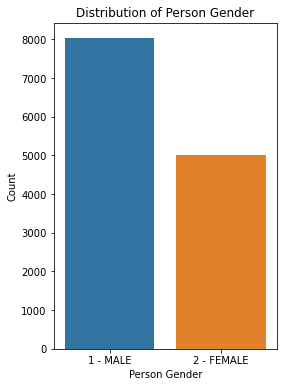

In [648]:
plt.figure(figsize=(4, 6)) 
sns.countplot(x='Person Gender', data=reg_train)
plt.title('Distribution of Person Gender')
plt.xlabel('Person Gender')
plt.ylabel('Count')
plt.show()

In [649]:
reg_train = pd.get_dummies(reg_train, columns=['Person Gender'], drop_first=True)

In [650]:
reg_train.columns

Index(['Crash ID', 'Speed Limit', 'Person Age', 'y',
       'Crash Severity_A - SUSPECTED SERIOUS INJURY',
       'Crash Severity_B - SUSPECTED MINOR INJURY',
       'Crash Severity_C - POSSIBLE INJURY', 'Crash Severity_K - FATAL INJURY',
       'Crash Severity_N - NOT INJURED', 'Hour', 'Minute', 'Second',
       'Day of Week_MONDAY', 'Day of Week_SATURDAY', 'Day of Week_SUNDAY',
       'Day of Week_THURSDAY', 'Day of Week_TUESDAY', 'Day of Week_WEDNESDAY',
       'Manner of Collision Labels', 'Surface Condition_2 - WET',
       'Surface Condition_3 - STANDING WATER',
       'Surface Condition_7 - SAND, MUD, DIRT',
       'Surface Condition_98 - OTHER (EXPLAIN IN NARRATIVE)',
       'Weather Condition_2 - CLOUDY', 'Weather Condition_3 - RAIN',
       'Weather Condition_6 - FOG', 'Vehicle Body Style Labels',
       'Person Ethnicity_A - ASIAN', 'Person Ethnicity_B - BLACK',
       'Person Ethnicity_H - HISPANIC',
       'Person Ethnicity_I - AMER. INDIAN/ALASKAN NATIVE',
       'Person 

In [651]:
reg_train.dtypes

Crash ID                                               int64
Speed Limit                                            int64
Person Age                                             Int64
y                                                      int64
Crash Severity_A - SUSPECTED SERIOUS INJURY            uint8
Crash Severity_B - SUSPECTED MINOR INJURY              uint8
Crash Severity_C - POSSIBLE INJURY                     uint8
Crash Severity_K - FATAL INJURY                        uint8
Crash Severity_N - NOT INJURED                         uint8
Hour                                                   int64
Minute                                                 int64
Second                                                 int64
Day of Week_MONDAY                                     uint8
Day of Week_SATURDAY                                   uint8
Day of Week_SUNDAY                                     uint8
Day of Week_THURSDAY                                   uint8
Day of Week_TUESDAY     

In [652]:
reg_train.y

0         96
1         29
2         51
3         75
4        130
        ... 
13036     87
13037     37
13038     36
13039     39
13040     37
Name: y, Length: 13041, dtype: int64

In [653]:
reg_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13041 entries, 0 to 13040
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Crash ID                                             13041 non-null  int64
 1   Speed Limit                                          13041 non-null  int64
 2   Person Age                                           13041 non-null  Int64
 3   y                                                    13041 non-null  int64
 4   Crash Severity_A - SUSPECTED SERIOUS INJURY          13041 non-null  uint8
 5   Crash Severity_B - SUSPECTED MINOR INJURY            13041 non-null  uint8
 6   Crash Severity_C - POSSIBLE INJURY                   13041 non-null  uint8
 7   Crash Severity_K - FATAL INJURY                      13041 non-null  uint8
 8   Crash Severity_N - NOT INJURED                       13041 non-null  uint8
 9   Hour  

In [654]:
reg_train.describe()

,Crash ID,Speed Limit,Person Age,y,Crash Severity_A - SUSPECTED SERIOUS INJURY,Crash Severity_B - SUSPECTED MINOR INJURY,Crash Severity_C - POSSIBLE INJURY,Crash Severity_K - FATAL INJURY,Crash Severity_N - NOT INJURED,Hour,...,Weather Condition_3 - RAIN,Weather Condition_6 - FOG,Vehicle Body Style Labels,Person Ethnicity_A - ASIAN,Person Ethnicity_B - BLACK,Person Ethnicity_H - HISPANIC,Person Ethnicity_I - AMER. INDIAN/ALASKAN NATIVE,Person Ethnicity_OTHER,Person Ethnicity_W - WHITE,Person Gender_2 - FEMALE
count,1.304100e+04,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,...,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000,13041.000000
mean,1.962155e+07,46.055517,33.681159,63.669274,0.023771,0.145464,0.142704,0.003067,0.666207,14.124530,...,0.039261,0.000690,7.754927,0.073384,0.139637,0.195691,0.007668,0.057434,0.521279,0.384403
std,8.610370e+04,16.011441,16.795756,92.934701,0.152341,0.352582,0.349784,0.055300,0.471585,4.816477,...,0.194222,0.026262,2.410845,0.260776,0.346623,0.396747,0.087235,0.232679,0.499566,0.486472
min,1.928024e+07,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.954643e+07,35.000000,22.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.962358e+07,45.000000,31.000000,48.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.969618e+07,55.000000,43.000000,65.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.000000,...,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.976829e+07,75.000000,99.000000,1427.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,...,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [655]:
reg_train.isnull().sum()

Crash ID                                               0
Speed Limit                                            0
Person Age                                             0
y                                                      0
Crash Severity_A - SUSPECTED SERIOUS INJURY            0
Crash Severity_B - SUSPECTED MINOR INJURY              0
Crash Severity_C - POSSIBLE INJURY                     0
Crash Severity_K - FATAL INJURY                        0
Crash Severity_N - NOT INJURED                         0
Hour                                                   0
Minute                                                 0
Second                                                 0
Day of Week_MONDAY                                     0
Day of Week_SATURDAY                                   0
Day of Week_SUNDAY                                     0
Day of Week_THURSDAY                                   0
Day of Week_TUESDAY                                    0
Day of Week_WEDNESDAY          

In [656]:
reg_train

,Crash ID,Speed Limit,Person Age,y,Crash Severity_A - SUSPECTED SERIOUS INJURY,Crash Severity_B - SUSPECTED MINOR INJURY,Crash Severity_C - POSSIBLE INJURY,Crash Severity_K - FATAL INJURY,Crash Severity_N - NOT INJURED,Hour,...,Weather Condition_3 - RAIN,Weather Condition_6 - FOG,Vehicle Body Style Labels,Person Ethnicity_A - ASIAN,Person Ethnicity_B - BLACK,Person Ethnicity_H - HISPANIC,Person Ethnicity_I - AMER. INDIAN/ALASKAN NATIVE,Person Ethnicity_OTHER,Person Ethnicity_W - WHITE,Person Gender_2 - FEMALE
0,19757646,40,7,96,0,0,0,0,1,16,...,0,0,1,0,0,0,0,0,1,0
1,19759708,70,32,29,0,0,0,0,1,14,...,0,0,10,0,0,0,0,0,1,1
2,19659939,50,31,51,0,1,0,0,0,16,...,0,0,6,0,0,0,0,0,1,1
3,19717414,50,40,75,0,0,0,0,1,8,...,0,0,10,0,1,0,0,0,0,1
4,19507708,40,31,130,0,0,0,0,1,17,...,0,0,8,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13036,19718525,45,4,87,0,1,0,0,0,15,...,0,0,6,0,0,0,0,0,1,1
13037,19532067,25,37,37,0,0,0,0,1,7,...,0,0,10,0,0,0,0,0,1,1
13038,19653698,60,19,36,0,0,0,0,1,18,...,0,0,6,0,0,0,0,0,1,1
13039,19681275,50,65,39,0,0,0,0,1,5,...,0,0,6,0,1,0,0,0,0,0


In [657]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your feature matrix for regression_train dataset
scaler = StandardScaler()
y=reg_train['y']
reg_train_1=reg_train.drop('y', axis=1, inplace=True)
X_train_scaled = scaler.fit_transform(reg_train)


In [740]:
from sklearn.cluster import KMeans

# Assuming X_train_scaled is your scaled feature matrix
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose an appropriate number of clusters
kmeans.fit(X_train_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_


In [660]:
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


Cluster Centers:
[[ 1.96215502e+07  4.60102431e+01  3.57222137e+01  2.59899098e-02
   1.47836722e-01  1.38969577e-01  3.05763645e-03  6.77878000e-01
   1.40333282e+01  2.70123834e+01  0.00000000e+00  1.31631249e-01
   1.19247821e-01  8.82128115e-02  1.40192631e-01  1.28267849e-01
   1.29490904e-01  1.96541813e+01  2.47668552e-02  9.17290934e-04
   7.64409112e-04  7.64409112e-04  9.26463843e-02 -5.96744876e-16
   3.05763645e-04  7.84574224e+00  3.60822483e-16 -1.97064587e-15
  -3.30291350e-15  1.12757026e-17  7.97972799e-16  1.00000000e+00
   4.16908730e-01]
 [ 1.96238923e+07  4.50546366e+01  3.15852966e+01  2.25563910e-02
   1.40016708e-01  1.47702590e-01  3.34168755e-03  6.53801170e-01
   1.42364244e+01  2.67249791e+01  0.00000000e+00  1.32330827e-01
   1.26984127e-01  1.06599833e-01  1.35004177e-01  1.26482874e-01
   1.30492899e-01  1.95715957e+01  3.02422723e-02  3.34168755e-04
   1.00250627e-03  1.00250627e-03  9.82456140e-02 -4.02455846e-16
   6.68337510e-04  7.64795322e+00  1.540

In [661]:
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))


Cluster Centers:
[[ 1.96215502e+07  4.60102431e+01  3.57222137e+01  2.59899098e-02
   1.47836722e-01  1.38969577e-01  3.05763645e-03  6.77878000e-01
   1.40333282e+01  2.70123834e+01  0.00000000e+00  1.31631249e-01
   1.19247821e-01  8.82128115e-02  1.40192631e-01  1.28267849e-01
   1.29490904e-01  1.96541813e+01  2.47668552e-02  9.17290934e-04
   7.64409112e-04  7.64409112e-04  9.26463843e-02 -5.96744876e-16
   3.05763645e-04  7.84574224e+00  3.60822483e-16 -1.97064587e-15
  -3.30291350e-15  1.12757026e-17  7.97972799e-16  1.00000000e+00
   4.16908730e-01]
 [ 1.96238923e+07  4.50546366e+01  3.15852966e+01  2.25563910e-02
   1.40016708e-01  1.47702590e-01  3.34168755e-03  6.53801170e-01
   1.42364244e+01  2.67249791e+01  0.00000000e+00  1.32330827e-01
   1.26984127e-01  1.06599833e-01  1.35004177e-01  1.26482874e-01
   1.30492899e-01  1.95715957e+01  3.02422723e-02  3.34168755e-04
   1.00250627e-03  1.00250627e-03  9.82456140e-02 -4.02455846e-16
   6.68337510e-04  7.64795322e+00  1.540

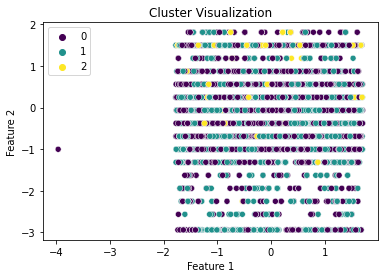

In [662]:

sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


#### function for preprocessing data for models:

In [726]:
def reg_test_data(reg_train):
    reg_train['Crash Severity'].fillna(reg_train['Crash Severity'].mode()[0], inplace=True)
    reg_train = pd.get_dummies(reg_train, columns=['Crash Severity'], drop_first=True)
    
    reg_train['Crash Time'].fillna(reg_train['Crash Time'].mode()[0], inplace=True)
    reg_train['Crash Time'] = pd.to_datetime(reg_train['Crash Time'])
    reg_train['Hour'] = reg_train['Crash Time'].dt.hour
    reg_train['Minute'] = reg_train['Crash Time'].dt.minute
    reg_train['Second'] = reg_train['Crash Time'].dt.second
    reg_train.drop('Crash Time', axis=1, inplace=True)
    
    reg_train['Day of Week'].fillna(reg_train['Day of Week'].mode()[0], inplace=True)
    reg_train = pd.get_dummies(reg_train, columns=['Day of Week'], drop_first=True)
    
    reg_train['Manner of Collision Labels'] = reg_train['Manner of Collision'].astype('category').cat.codes
    reg_train.drop('Manner of Collision', axis=1, inplace=True)
    
    reg_train['Surface Condition'].fillna(reg_train['Surface Condition'].mode()[0], inplace=True)
    reg_train['Surface Condition'] = reg_train['Surface Condition'].replace('99 - UNKNOWN', reg_train['Surface Condition'].mode()[0])
    reg_train = pd.get_dummies(reg_train, columns=['Surface Condition'], drop_first=True)
    
    reg_train.drop('Surface Type', axis=1, inplace=True)
    reg_train.drop('Surface Width', axis=1, inplace=True)

    reg_train['Weather Condition'].fillna(reg_train['Weather Condition'].mode()[0], inplace=True)
    reg_train['Weather Condition'] = reg_train['Weather Condition'].replace('98 - OTHER (EXPLAIN IN NARRATIVE)', reg_train['Weather Condition'].mode()[0])
    reg_train['Weather Condition'] = reg_train['Weather Condition'].replace('99 - UNKNOWN', reg_train['Weather Condition'].mode()[0])
    reg_train = pd.get_dummies(reg_train, columns=['Weather Condition'], drop_first=True)
    
    reg_train['Vehicle Body Style'].fillna(reg_train['Vehicle Body Style'].mode()[0], inplace=True)
    reg_train['Vehicle Body Style'] = reg_train['Vehicle Body Style'].replace('99 - UNKNOWN', reg_train['Vehicle Body Style'].mode()[0])
    reg_train['Vehicle Body Style'] = reg_train['Vehicle Body Style'].replace('98 - OTHER  (EXPLAIN IN NARRATIVE)', reg_train['Vehicle Body Style'].mode()[0])
    reg_train['Vehicle Body Style'] = reg_train['Vehicle Body Style'].replace('No Data', reg_train['Vehicle Body Style'].mode()[0])
    reg_train['Vehicle Body Style Labels'] = reg_train['Vehicle Body Style'].astype('category').cat.codes
    reg_train.drop('Vehicle Body Style', axis=1, inplace=True)
    
    reg_train['Person Age'] = reg_train['Person Age'].replace('No Data', np.nan)
    reg_train['Person Age'].fillna(reg_train['Person Age'].median(), inplace=True)
    reg_train['Person Age'] = pd.to_numeric(reg_train['Person Age'], errors='coerce').astype('Int64')
    
    reg_train.drop('Person Alcohol Result', axis=1, inplace=True)
    reg_train.drop('Person Drug Test Result', axis=1, inplace=True)
    
    reg_train['Person Ethnicity'].fillna(reg_train['Person Ethnicity'].mode()[0], inplace=True)
    reg_train['Person Ethnicity'] = reg_train['Person Ethnicity'].replace(['99 - UNKNOWN', 'No Data'], 'OTHER')
    reg_train = pd.get_dummies(reg_train, columns=['Person Ethnicity'], drop_first=True)
    
    reg_train['Person Gender'].fillna(reg_train['Person Gender'].mode()[0], inplace=True)
    reg_train['Person Gender'] = reg_train['Person Gender'].replace('99 - UNKNOWN', reg_train['Person Gender'].mode()[0])
    reg_train = pd.get_dummies(reg_train, columns=['Person Gender'], drop_first=True)
    
    scaler = StandardScaler()
    #y=reg_train['y']
    #reg_train.drop('y', axis=1, inplace=True)
    X_train_scaled = scaler.fit_transform(reg_train)
    
    return reg_train

In [727]:
X_test = reg_test_data(reg_test)

### Regression model training

In [733]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.2, random_state=42)


In [664]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# ... other models

# Example with Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Example with Random Forest Regression
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)


RandomForestRegressor()

In [665]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Example with Linear Regression
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R-squared: {r2_lr}")


Linear Regression - MSE: 7949.59114534477, MAE: 34.73774459271217, R-squared: 0.07316212272190847


In [666]:
from sklearn.model_selection import GridSearchCV

# Example with Random Forest Regression and Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_


In [667]:
best_params_rf

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [668]:
# Example with the best Random Forest model from the grid search
y_pred_rf_tuned = best_model_rf.predict(X_test)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print(f"Tuned Random Forest - MSE: {mse_rf_tuned}, MAE: {mae_rf_tuned}, R-squared: {r2_rf_tuned}")


Tuned Random Forest - MSE: 7479.2694733806065, MAE: 29.926259103104638, R-squared: 0.12799663334154143


### Regression prediction

In [736]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [737]:
y_pred = model_lr.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 7949.59114534477
Mean Absolute Error: 34.73774459271217
R-squared: 0.07316212272190847


In [741]:
predictions_lr = model_lr.predict(X_test)
predictions_lr

array([47.28446772, 60.4807007 , 85.22974607, ..., 68.1870465 ,
       64.5041351 , 55.84002076])

In [742]:
predictions_rf = model_rf.predict(X_test)
predictions_rf

array([ 58.45,  51.56, 115.2 , ...,  74.78,  80.55, 101.96])

In [738]:
y_pred = model_rf.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")



Mean Squared Error: 7518.213780337294
Mean Absolute Error: 29.939620544269836
R-squared: 0.12345614086439816
